## Importing codes

So I have 2 csv files, the first one being the original merged data, stored as [`original`], and the cumulated data, stored as [`data`].

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import the file as data
data = pd.read_csv("../data/merged_data.csv")

#Import the file as original_merged
original = pd.read_csv("../data/original_merged_data.csv")


In [ ]:
#Describe the data
print(data.shape)
print(data.columns)

print(original.shape)
print(original.columns)

Need to define non-disease categories vs Disease categories

In [ ]:
# Non-disease categories
non_disease_cols = ['no_of_rainy_days', 'total_rainfall', 'mean_rh', 'maximum_rainfall_in_a_day', 
                    'wet_bulb_temperature', 'mean_sunshine_hrs', 
                    'monthly_mean_of_min_daily_temperature_celcius']

# Disease categories
disease_cols = [col for col in data.columns if col not in non_disease_cols]

# Creating the correlation matrix
correlation_matrix = data[non_disease_cols + disease_cols].corr()

# Getting the correlation between non-disease and disease categories
correlation = correlation_matrix.loc[non_disease_cols, disease_cols]

print(correlation)


## Data Dictionary Section

## Exploratory Data Analysis

Instructions

1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Summary Statistics

Here I want to generate summary statistics for both of the datasets that I am using.

In [ ]:
# Summary statistics for 'data' dataframe
print(f"Shape of 'data' dataframe {data.shape}")
print("Summary statistics for 'data' dataframe:")
print(data.describe())


In [ ]:
# Summary statistics for 'original' dataframe
print(f"Shape of 'original' dataframe {original.shape}")
print("\nSummary statistics for 'original' dataframe:")
print(original.describe())

### Standard Deviation using Dictionary Comprehension

Will be using the original data provided by GA, found in the `original` dataframe.

In [54]:
# Standard deviation for 'original' dataframe in dictionary format
#I decided to use a 

sd_original = {col: original[col].std() for col in original.select_dtypes(include=[np.number]).columns}

print("\nStandard deviation for 'original' dataframe:")
print(sd_original)


Standard deviation for 'original' dataframe:
{'no_of_rainy_days': 4.947393841903985, 'year': 11.752660168609166, 'month': 3.449094578043289, 'total_rainfall': 113.91602880233788, 'mean_rh': 3.413939611926605, 'maximum_rainfall_in_a_day': 35.746423404828235, 'wet_bulb_temperature': 0.5939788483716842, 'mean_sunshine_hrs': 1.2057046319090239, 'monthly_mean_of_min_daily_temperature_celcius': 0.8021948874761341}


### Compulsory trend investigations

1. Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
2. Which year have the highest and lowest total rainfall in the date range of analysis?
3. Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
4. Which year have the highest and lowest number of rainy days in the date range of analysis?
5. Are there any outliers months in the dataset?


These will all be done in the `original` dataset

#### 1. Which month have the highest and lowest total rainfall in 1990, 2000, 2010, and 2020?

Goal - create a loop function for filtering the 'year' column for 1990, 2000, 2010 and 2020, that will return the 'month' of the row for which the 'total_rainfall' value is the highest.

In [68]:
for year in [1990, 2000, 2010, 2020]:
    year_data = original[original['year'] == year]
    max_rainfall_month = year_data[year_data['total_rainfall'] == year_data['total_rainfall'].max()]['month'].values[0]
    min_rainfall_month = year_data[year_data['total_rainfall'] == year_data['total_rainfall'].min()]['month'].values[0]
    print(f"In {year}, the month with the highest total rainfall is {max_rainfall_month},\nand the month with the lowest total rainfall is {min_rainfall_month}.\n")




In 1990, the month with the highest total rainfall is 9,
and the month with the lowest total rainfall is 2.

In 2000, the month with the highest total rainfall is 11,
and the month with the lowest total rainfall is 9.

In 2010, the month with the highest total rainfall is 7,
and the month with the lowest total rainfall is 2.

In 2020, the month with the highest total rainfall is 5,
and the month with the lowest total rainfall is 2.



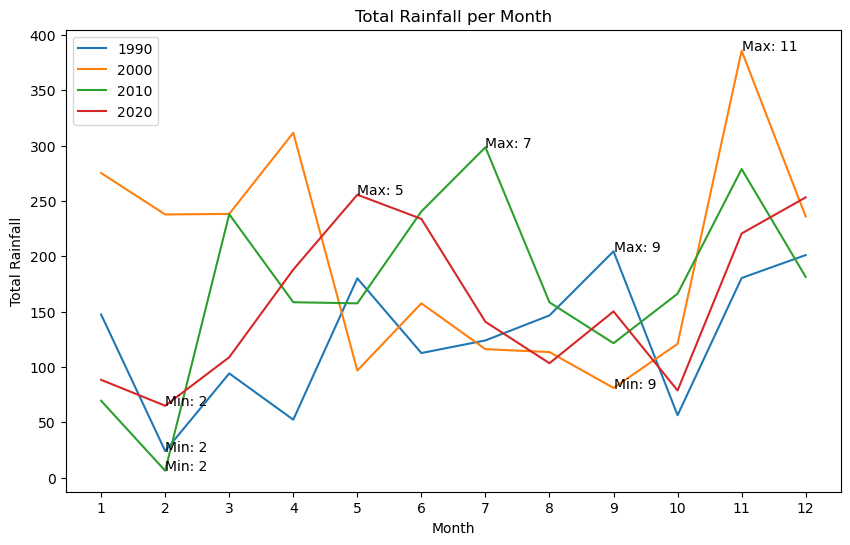

In [84]:
#Showcase it in a graph
plt.figure(figsize=(10, 6))

# Plotting lines for each year
for year in [1990, 2000, 2010, 2020]:
    yearly_data = original[original['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['total_rainfall'], label=year)
    
    # Adding text values next to the hgihest and lowest rainfall p m months
    max_rainfall_month = yearly_data[yearly_data['total_rainfall'] == yearly_data['total_rainfall'].max()]['month'].values[0]
    min_rainfall_month = yearly_data[yearly_data['total_rainfall'] == yearly_data['total_rainfall'].min()]['month'].values[0]
    plt.text(max_rainfall_month, yearly_data['total_rainfall'].max(), f'Max: {max_rainfall_month}')
    plt.text(min_rainfall_month, yearly_data['total_rainfall'].min(), f'Min: {min_rainfall_month}')

plt.title('Total Rainfall per Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.xticks(range(1, 13))  # x ticks for every single month
plt.legend()
plt.show()



#### 2. Which year has the highest and lowest total rainfall in the date range of analysis?

In [ ]:
# Calculate total rainfall for each year
yearly_rainfall = original.groupby('year')['total_rainfall'].sum()

# Find the year with the highest and lowest total rainfall
max_rainfall_year = yearly_rainfall.idxmax()
min_rainfall_year = yearly_rainfall.idxmin()

print(f"The year with the highest total rainfall is {max_rainfall_year},\nand the year with the lowest total rainfall is {min_rainfall_year}.")
print(f"\nHere is the list of years and their corresponding total rainfalls:\n{yearly_rainfall} ")

Just making a graph to visualize the accuracy of the output:

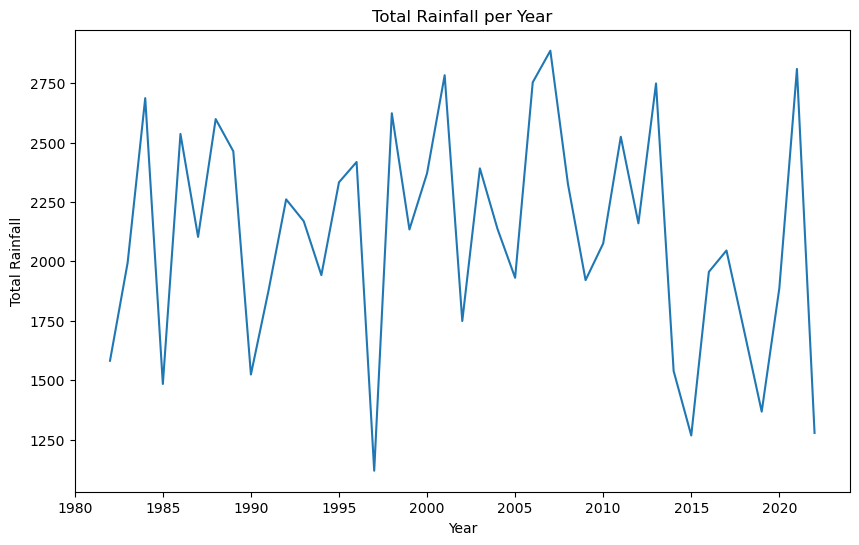

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall)
plt.title('Total Rainfall per Year')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.show()

Seems about right, the highest value is 2007 and the lowest is 1997.

#### 3. Which months have the highest and lowest number of rain days in 1990, 2000, 2010, and 2020?

Code is incredibly similar to problem 1:

In [80]:
for year in [1990, 2000, 2010, 2020]:
    year_data = original[original['year'] == year]
    max_rainy_days_month = year_data[year_data['no_of_rainy_days'] == year_data['no_of_rainy_days'].max()]['month'].values[0]
    min_rainy_days_month = year_data[year_data['no_of_rainy_days'] == year_data['no_of_rainy_days'].min()]['month'].values[0]
    print(f"In {year}, the month with the HIGHEST number of rainy days is {max_rainy_days_month}\nand the month with the LOWEST number of rainy days is {min_rainy_days_month}.\n")


In 1990, the month with the HIGHEST number of rainy days is 9
and the month with the LOWEST number of rainy days is 3.

In 2000, the month with the HIGHEST number of rainy days is 11
and the month with the LOWEST number of rainy days is 5.

In 2010, the month with the HIGHEST number of rainy days is 11
and the month with the LOWEST number of rainy days is 2.

In 2020, the month with the HIGHEST number of rainy days is 7
and the month with the LOWEST number of rainy days is 1.



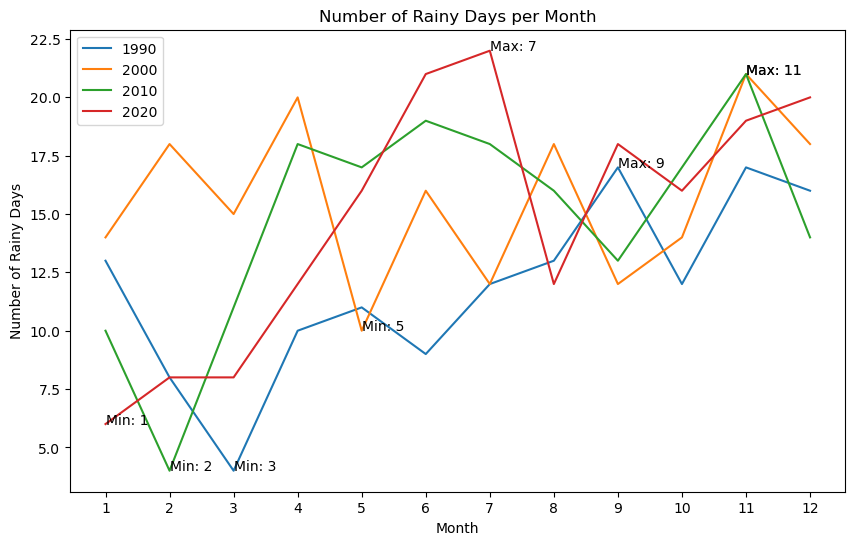

In [85]:
#Visualize it

plt.figure(figsize=(10, 6))

# Plotting a line for each year
for year in [1990, 2000, 2010, 2020]:
    yearly_data = original[original['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['no_of_rainy_days'], label=year)
    
    # Add text labels for the months with highest and lowest number of rainy days 
    max_rainy_days_month = yearly_data[yearly_data['no_of_rainy_days'] == yearly_data['no_of_rainy_days'].max()]['month'].values[0]
    min_rainy_days_month = yearly_data[yearly_data['no_of_rainy_days'] == yearly_data['no_of_rainy_days'].min()]['month'].values[0]
    plt.text(max_rainy_days_month, yearly_data['no_of_rainy_days'].max(), f'Max: {max_rainy_days_month}')
    plt.text(min_rainy_days_month, yearly_data['no_of_rainy_days'].min(), f'Min: {min_rainy_days_month}')

plt.title('Number of Rainy Days per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.xticks(range(1, 13))  #x ticks for every single month
plt.legend()
plt.show()


#### 4. Which years have the highest and lowest number of rainy days in the date range of analysis?

Group by year for number of rainy days then find the year with the max rainy days and the year with the min rainy days (`idmax()` and `idmin()`)


In [88]:
# Calculate total number of rainy days for each year
yearly_rainy_days = original.groupby('year')['no_of_rainy_days'].sum()

# Find the year with the highest and lowest number of rainy days
max_rainy_days_year = yearly_rainy_days.idxmax()
min_rainy_days_year = yearly_rainy_days.idxmin()

print(f"The year with the highest number of rainy days is {max_rainy_days_year} \nand the year with the lowest number of rainy days is {min_rainy_days_year}.")


The year with the highest number of rainy days is 2013 
and the year with the lowest number of rainy days is 1997.


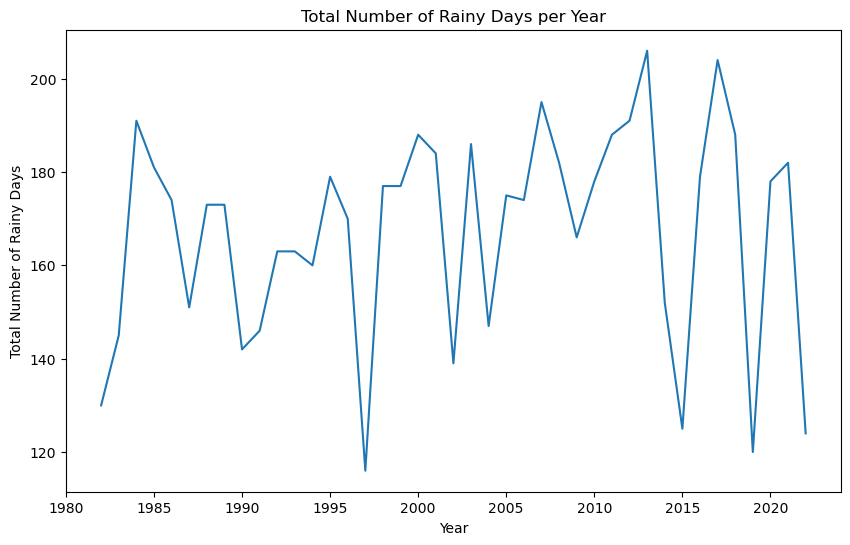

In [90]:
# Calculate total number of rainy days for each year
yearly_rainy_days = original.groupby('year')['no_of_rainy_days'].sum()

# Plot
plt.figure(figsize=(10, 6)) # I just like the x-axis broader
sns.lineplot(x=yearly_rainy_days.index, y=yearly_rainy_days.values)
plt.title('Total Number of Rainy Days per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Rainy Days')
plt.show()



As you can see, the year with the highest number of rainy days is 2013 and the year with the lowest is 1997.

#### 5. Are there any outliers months in the dataset?

I will create a boxplot of each of the columns within the `original` dataframe and then answer the question in terms of which rows (each row represents a month of data in the different columns) are considered outliers in that column category. 

Outliers in a boxplot are represented as diamonds that fall outside of the 2.7 standard deviations from the mean

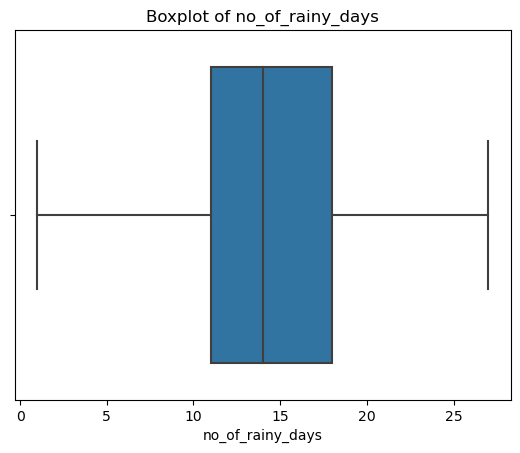

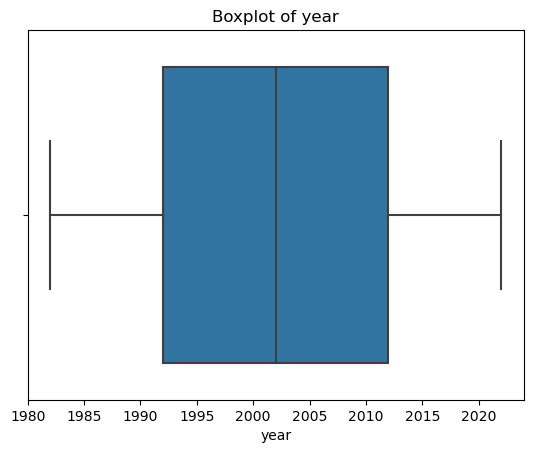

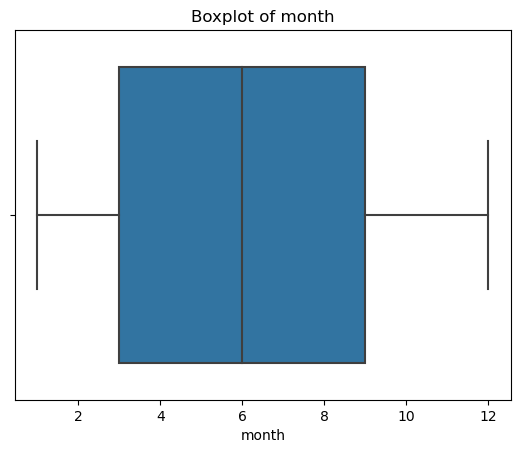

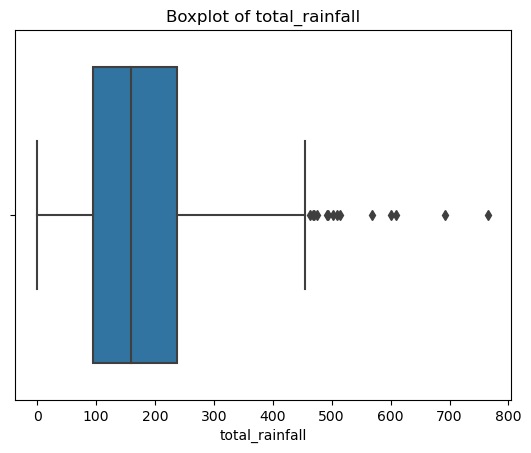

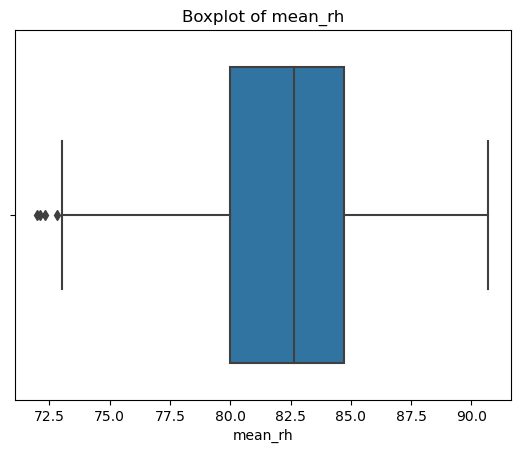

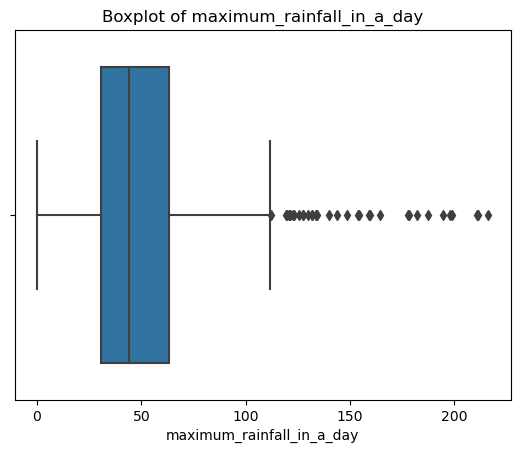

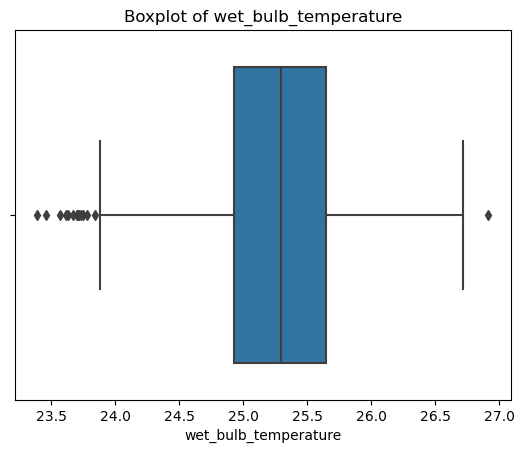

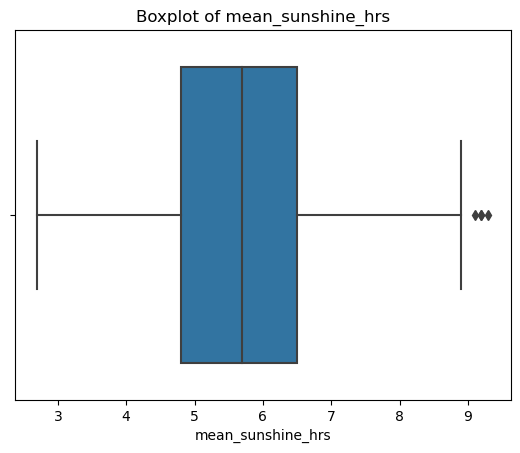

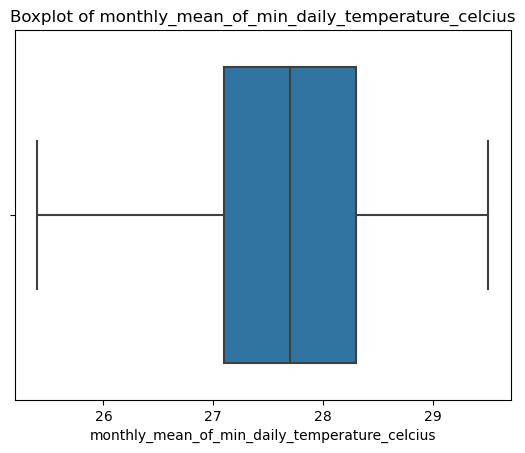

In [93]:
# Select numeric columns
numeric_cols = original.select_dtypes(include=[np.number]).columns

# Create boxplots for each numeric column
for col in numeric_cols:
    sns.boxplot(x=original[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



According to this data, 